In [1]:
from fastai.vision import *
# from fastai.datasets import *
# from fastai.imports import *

In [2]:
from adastop import AdaStop

In [3]:
path = Config.data_path()/'planet'

In [4]:
pd.read_csv(path/'train_v2.csv').head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [6]:
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
      .split_by_rand_pct()
      .label_from_df(label_delim=' '))

In [7]:
data = (src.transform(tfms, size=128)
       .databunch().normalize(imagenet_stats))

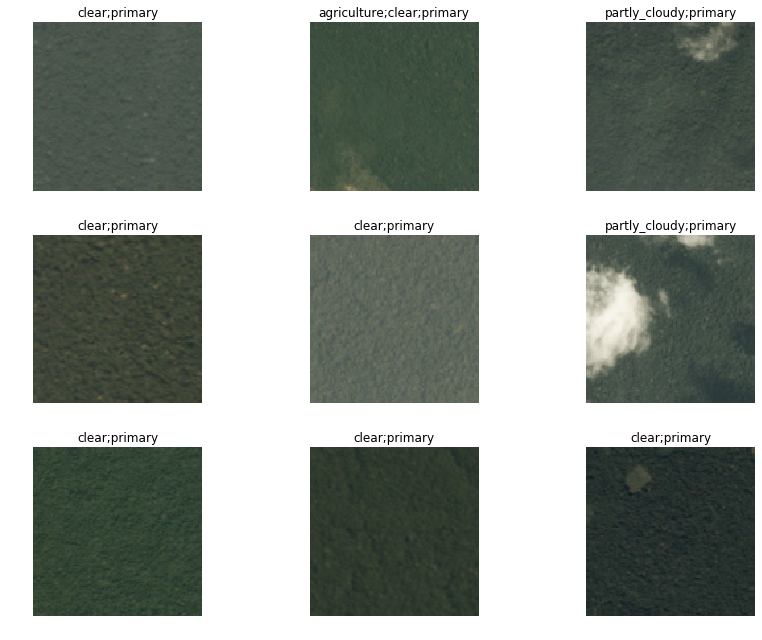

In [8]:
data.show_batch(rows=3, figsize=(12, 9))

In [9]:
arch = models.resnet34

In [10]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [11]:
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])
learn.opt_func = AdaStop

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


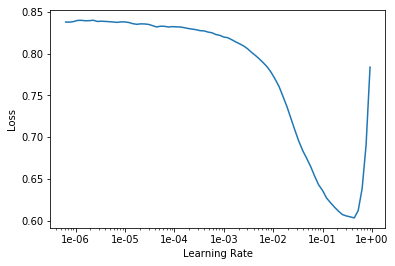

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
lr = 0.01

In [14]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.129730,0.114237,0.941896,0.899749,01:38
1,0.114133,0.102519,0.947535,0.910264,00:55
2,0.105541,0.096230,0.951197,0.914749,00:54
3,0.098583,0.093124,0.954155,0.918201,00:56
4,0.097195,0.091694,0.953639,0.920434,00:56


In [15]:
learn.save('stage-1-rn34')

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


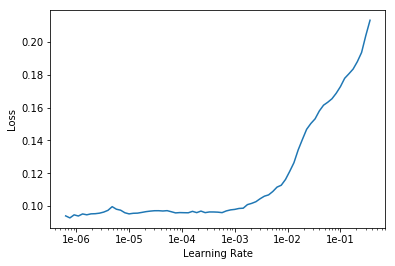

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.099575,0.093315,0.950674,0.918593,00:56
1,0.096260,0.091089,0.954998,0.921251,00:58
2,0.090646,0.088084,0.957527,0.924265,01:00
3,0.085401,0.085539,0.956059,0.925245,00:58
4,0.084522,0.085535,0.956742,0.924269,00:57


In [19]:
learn.save('stage-2-rn34')

In [20]:
data = (src.transform(tfms, size=256)
       .databunch().normalize(imagenet_stats))
learn.data = data

In [21]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


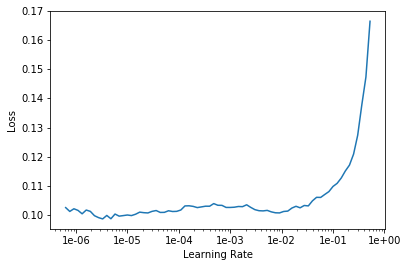

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
lr = 1e-2/2

In [24]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.091535,0.088219,0.953878,0.921536,01:57
1,0.088679,0.087131,0.958929,0.922107,01:54
2,0.085655,0.084643,0.957730,0.925668,01:57
3,0.087177,0.083584,0.957163,0.926022,01:58
4,0.084275,0.083691,0.958180,0.926401,01:56


In [25]:
learn.save('stage-1-256-rn50')

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.085193,0.086339,0.954794,0.923336,02:01
1,0.087520,0.085590,0.958420,0.925162,02:02
2,0.084085,0.083990,0.958137,0.925933,02:03
3,0.081696,0.082848,0.958289,0.927119,02:04
4,0.079043,0.082773,0.958435,0.927673,02:03


In [28]:
learn.save('stage-2-256-rn34')

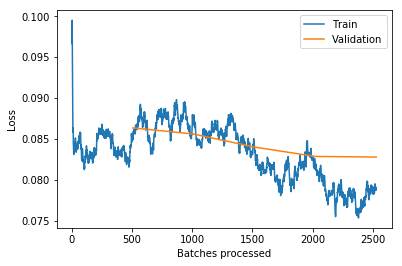

In [29]:
learn.recorder.plot_losses()

In [30]:
learn.export()